In [64]:
#Import library
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from IPython.display import display

In [79]:
# Membaca dataset (misalnya, Online Retail)
# Load dataset
file_path = 'sample_data/Student Depression Dataset.csv'
data = pd.read_csv(file_path)
df = data


# Menampilkan data subset dengan gaya tabel
display(subset_df.head(10))


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
19981,101205,Female,29.0,Kalyan,Student,2.0,0.0,8.53,3.0,0.0,More than 8 hours,Healthy,B.Arch,No,10.0,5.0,No,0
16551,83727,Male,28.0,Srinagar,Student,2.0,0.0,5.57,5.0,0.0,7-8 hours,Unhealthy,M.Tech,Yes,3.0,1.0,Yes,0
7640,38395,Male,34.0,Varanasi,Student,3.0,0.0,5.12,4.0,0.0,More than 8 hours,Moderate,M.Pharm,Yes,4.0,3.0,Yes,0
21266,107434,Male,21.0,Mumbai,Student,5.0,0.0,8.95,2.0,0.0,Less than 5 hours,Unhealthy,B.Pharm,Yes,8.0,1.0,No,1
15759,79662,Male,25.0,Visakhapatnam,Student,5.0,0.0,7.87,2.0,0.0,Less than 5 hours,Healthy,B.Ed,No,0.0,3.0,No,1
27146,136821,Male,24.0,Nagpur,Student,3.0,0.0,6.89,1.0,0.0,5-6 hours,Unhealthy,B.Com,Yes,6.0,1.0,Yes,1
24868,125270,Male,18.0,Vasai-Virar,Student,5.0,0.0,9.88,5.0,0.0,5-6 hours,Moderate,Class 12,Yes,10.0,2.0,Yes,1
26237,132248,Female,24.0,Vasai-Virar,Student,2.0,0.0,7.08,2.0,0.0,Less than 5 hours,Healthy,B.Arch,Yes,12.0,1.0,Yes,1
7260,36533,Male,20.0,Surat,Student,4.0,0.0,6.38,2.0,0.0,5-6 hours,Moderate,Class 12,No,0.0,2.0,Yes,0
19527,98935,Male,32.0,Hyderabad,Student,5.0,0.0,7.10,1.0,0.0,Less than 5 hours,Unhealthy,MCA,Yes,12.0,5.0,Yes,1


In [66]:
# Cek nilai hilang
missing_values = df.isnull().sum()
print("Jumlah nilai hilang per kolom:\n", missing_values)

Jumlah nilai hilang per kolom:
 id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64


In [67]:
# Mengatasi nilai hilang
# Contoh: menghapus semua baris dengan nilai hilang
df.dropna(inplace=True)
missing_values = df.isnull().sum()
print("Jumlah nilai hilang per kolom:\n", missing_values)

Jumlah nilai hilang per kolom:
 id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64


In [68]:
# Cek duplikasi
duplicates = df.duplicated().sum()
print("Jumlah baris duplikat:", duplicates)
# Menghapus baris duplikat
df.drop_duplicates(inplace=True)

Jumlah baris duplikat: 0


In [69]:
# Informasi umum
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 27898 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27898 non-null  int64  
 1   Gender                                 27898 non-null  object 
 2   Age                                    27898 non-null  float64
 3   City                                   27898 non-null  object 
 4   Profession                             27898 non-null  object 
 5   Academic Pressure                      27898 non-null  float64
 6   Work Pressure                          27898 non-null  float64
 7   CGPA                                   27898 non-null  float64
 8   Study Satisfaction                     27898 non-null  float64
 9   Job Satisfaction                       27898 non-null  float64
 10  Sleep Duration                         27898 non-null  object 
 11  Dietary

In [70]:
data.describe(include='all')

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
count,27898.000000,27898,27898.000000,27898,27898,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000,27898,27898,27898,27898,27898.000000,27898.000000,27898,27898.000000
unique,NaN,2,NaN,52,14,NaN,NaN,NaN,NaN,NaN,5,4,28,2,NaN,NaN,2,NaN
top,NaN,Male,NaN,Kalyan,Student,NaN,NaN,NaN,NaN,NaN,Less than 5 hours,Unhealthy,Class 12,Yes,NaN,NaN,No,NaN
freq,NaN,15546,NaN,1570,27867,NaN,NaN,NaN,NaN,NaN,8309,10316,6080,17656,NaN,NaN,14397,NaN
mean,70442.953402,NaN,25.822174,NaN,NaN,3.141336,0.000430,7.656160,2.943974,0.000681,NaN,NaN,NaN,NaN,7.156570,3.139867,NaN,0.585526
std,40642.015063,NaN,4.905651,NaN,NaN,1.381462,0.043994,1.470708,1.361122,0.044397,NaN,NaN,NaN,NaN,3.707598,1.437347,NaN,0.492640
min,2.000000,NaN,18.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.000000,NaN,0.000000
25%,35040.750000,NaN,21.000000,NaN,NaN,2.000000,0.000000,6.290000,2.000000,0.000000,NaN,NaN,NaN,NaN,4.000000,2.000000,NaN,0.000000
50%,70689.000000,NaN,25.000000,NaN,NaN,3.000000,0.000000,7.770000,3.000000,0.000000,NaN,NaN,NaN,NaN,8.000000,3.000000,NaN,1.000000
75%,105824.750000,NaN,30.000000,NaN,NaN,4.000000,0.000000,8.920000,4.000000,0.000000,NaN,NaN,NaN,NaN,10.000000,4.000000,NaN,1.000000


In [71]:
#Encoding kolom "sleep_duration"
df = pd.get_dummies(df, columns=['Sleep Duration'], prefix='sleep')
display(df.head())


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,...,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,sleep_5-6 hours,sleep_7-8 hours,sleep_Less than 5 hours,sleep_More than 8 hours,sleep_Others
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,...,Yes,3.0,1.0,No,1,True,False,False,False,False
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,...,No,3.0,2.0,Yes,0,True,False,False,False,False
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,...,No,9.0,1.0,Yes,0,False,False,True,False,False
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,...,Yes,4.0,5.0,Yes,1,False,True,False,False,False
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,...,Yes,1.0,1.0,No,0,True,False,False,False,False


In [72]:
# Cek nilai unik

unique_values = df.nunique()

# Menampilkan data
display(unique_values.to_frame(name='Jumlah Nilai Unik').reset_index().rename(columns={'index': 'Kolom'}))


,Kolom,Jumlah Nilai Unik
0,id,27898
1,Gender,2
2,Age,34
3,City,52
4,Profession,14
5,Academic Pressure,6
6,Work Pressure,3
7,CGPA,332
8,Study Satisfaction,6
9,Job Satisfaction,5


<ipython-input-73-24e2eb6aa25c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Depression", palette="Set2")  # df is now defined


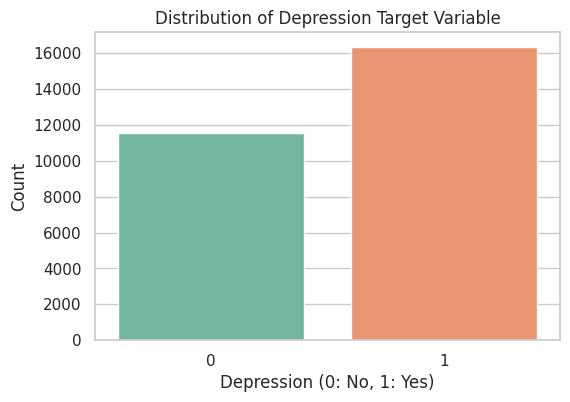

In [73]:
# Load dataset
file_path = 'sample_data/Student Depression Dataset.csv'
data = pd.read_csv(file_path)
df = data  # Define df here to make it available in the next cell

#Distribusi kolom "Depresi"
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Depression", palette="Set2")  # df is now defined
plt.title("Distribution of Depression Target Variable")
plt.xlabel("Depression (0: No, 1: Yes)")
plt.ylabel("Count")
plt.show()

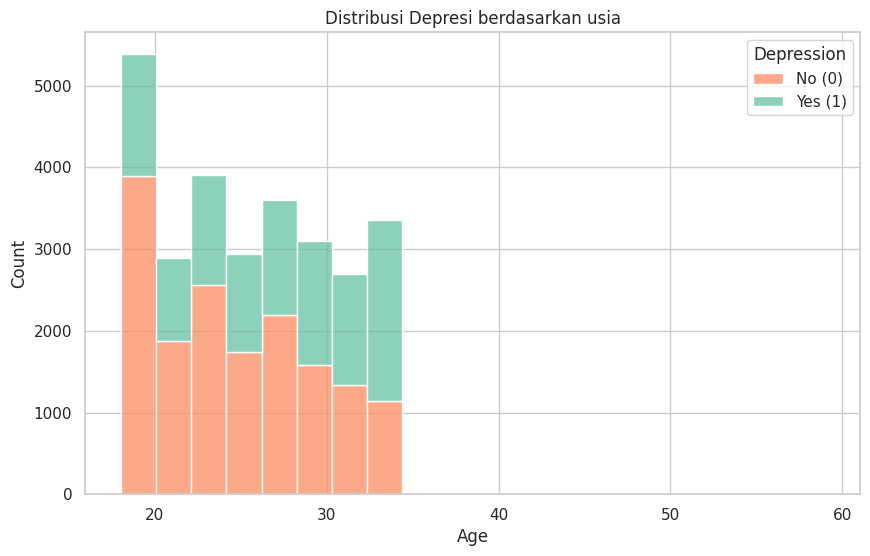

In [74]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Age", hue="Depression", multiple="stack", bins=20, palette="Set2", kde=False)
plt.title("Distribusi Depresi berdasarkan usia")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(title="Depression", labels=["No (0)", "Yes (1)"])
plt.show()


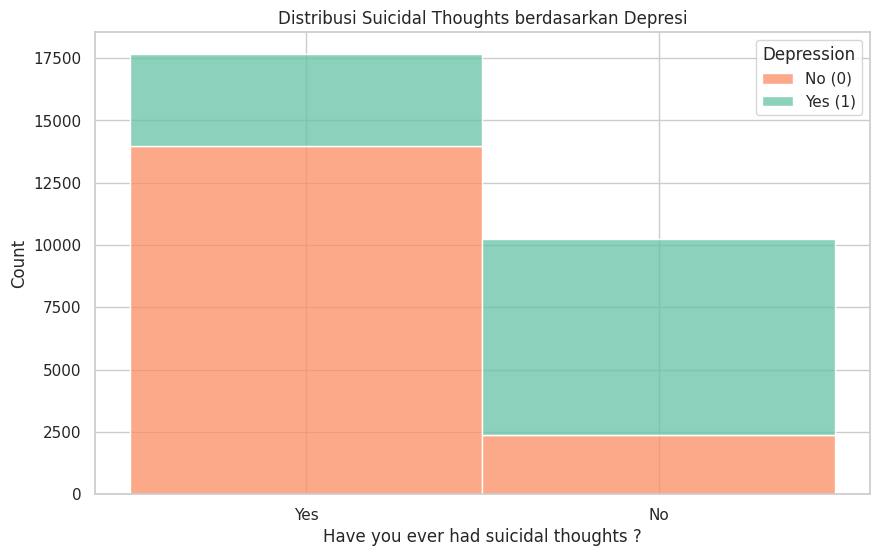

In [80]:


# Membuat visualisasi distribusi kolom 'Have you ever had suicidal thoughts?' berdasarkan kolom 'Depression'
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Have you ever had suicidal thoughts ?", hue="Depression", multiple="stack", bins=2, palette="Set2", kde=False)
plt.title("Distribusi Suicidal Thoughts berdasarkan Depresi")
plt.xlabel("Have you ever had suicidal thoughts ?")
plt.ylabel("Count")
plt.legend(title="Depression", labels=["No (0)", "Yes (1)"])
plt.show()


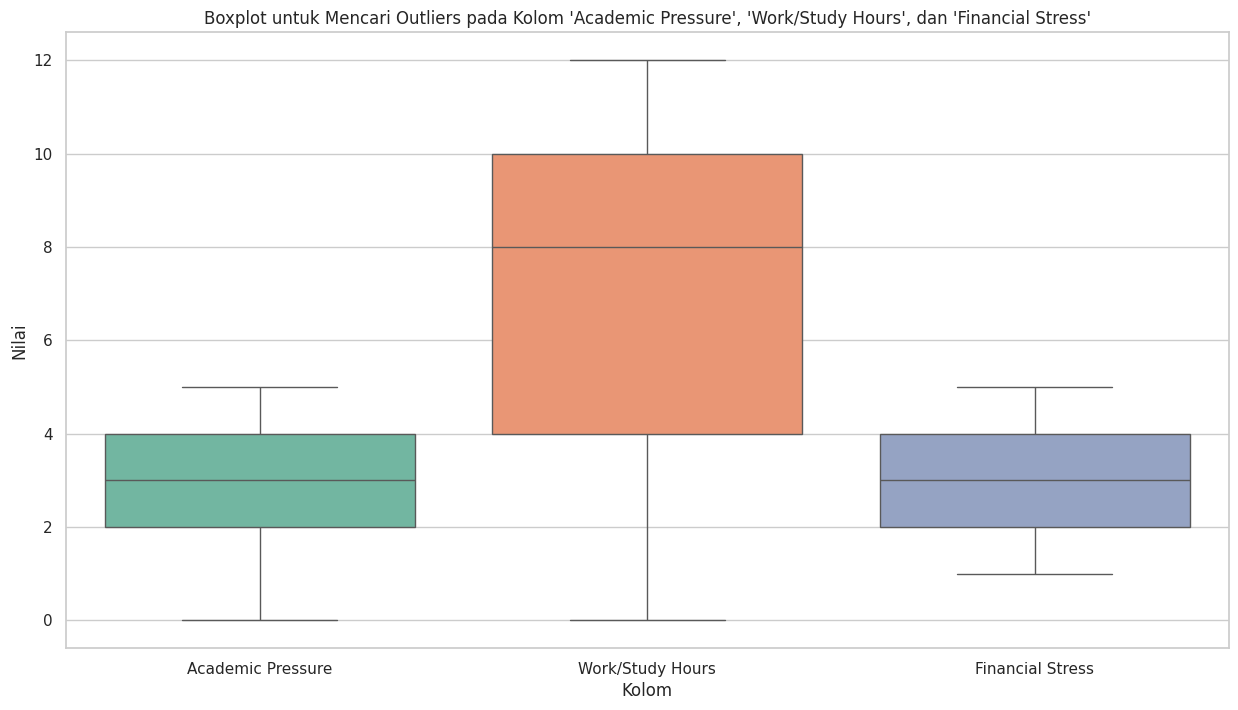

In [88]:
#boxplot kolom 'Academic Pressure', 'Work/Study Hours', 'Financial Stress'
plt.figure(figsize=(15, 8))
sns.boxplot(data=df[['Academic Pressure', 'Work/Study Hours', 'Financial Stress']], palette="Set2")
plt.title("Boxplot untuk Mencari Outliers pada Kolom 'Academic Pressure', 'Work/Study Hours', dan 'Financial Stress'")
plt.xlabel("Kolom")
plt.ylabel("Nilai")
plt.show()


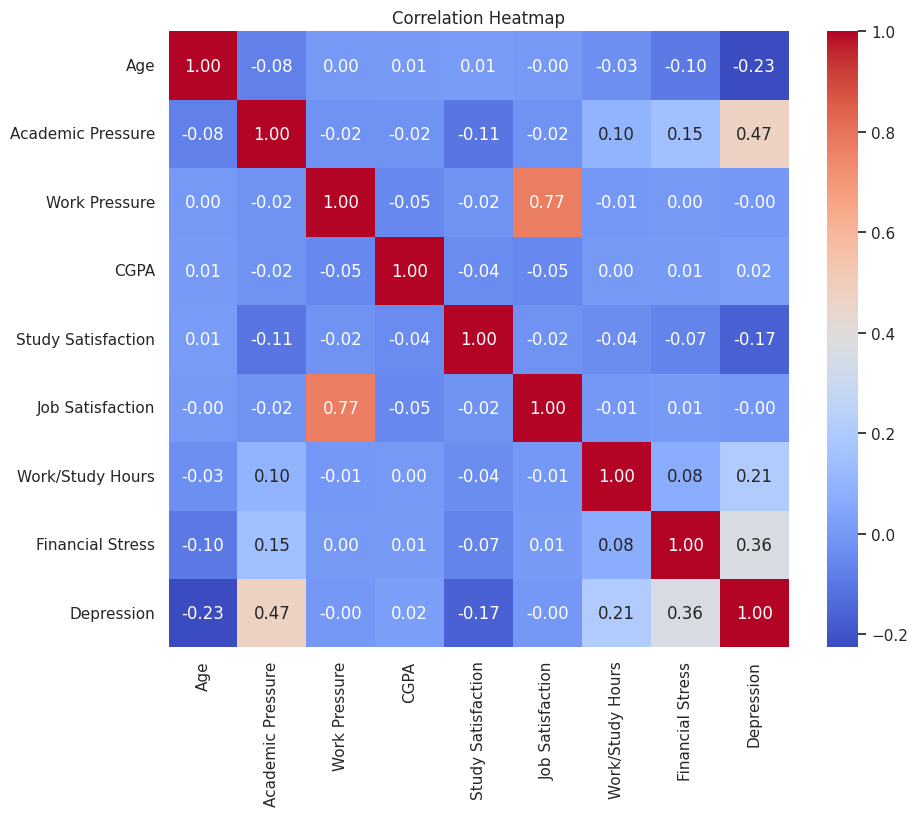

In [75]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_features + ["Depression"]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [92]:
# Simpan file dalam format Excel
preprocessed_file = "preprocessed_data_depresi.xlsx"
df.to_csv(preprocessed_file, index=False)


In [93]:
from google.colab import files

# Unduh file
files.download(preprocessed_file)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>